In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import MeanShift
from scipy.special import boxcox1p
from sklearn.cluster import estimate_bandwidth
from sklearn.linear_model import LinearRegression, Lasso , ElasticNet ,Ridge
from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
y = train['SalePrice']
df = pd.concat([train.drop('SalePrice',axis=1),test],axis=0,ignore_index = True)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df.shape

(2919, 79)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Data Visualization

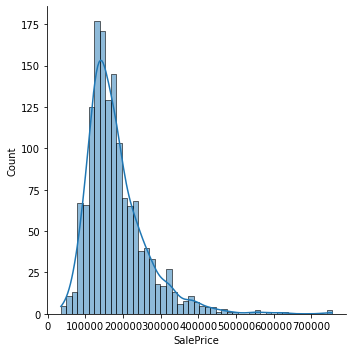

In [9]:
sns.displot(y, kde=True)

Therer are total of 80 features and since it is tedious process to visualize every feature, we will only investigate plots based on the correlation.

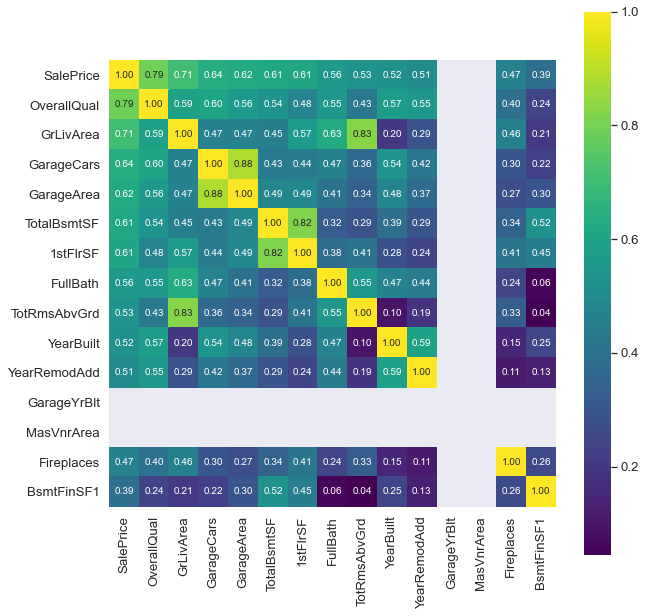

In [10]:
cols = train.corr().nlargest(15, 'SalePrice')['SalePrice'].index
corr_mat = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.2)
plt.figure(figsize=(10,10))
hm = sns.heatmap(corr_mat, cmap="viridis", 
                 cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

GarageArea and GarageCars
TotRmsAbvGrd and GrLivArea
1stFlrSF and TotalBsmtSF
are all highly correlated with  >= 0.8. Hence, we will drop GarageArea, TotRmsAbvGrd and TotalBsmtSF later. 

# Replace NaN Values

In [11]:
null_prop = df.isnull().sum()/len(df.isnull())
prop_null_df = pd.DataFrame({'Prop. of NaN' : null_prop[null_prop != 0].sort_values(ascending = False)})
prop_null_df

,Prop. of NaN
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageYrBlt,0.054471
GarageQual,0.054471
GarageCond,0.054471


Since the top five features are dominated by NaN, we will simply just drop them.

In [12]:
df.drop(['PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu'], axis = 1, inplace = True)

In [13]:
lot_median = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(lot_median)

In [14]:
none_col = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for column in none_col:
    df[column].fillna('None', inplace=True)

In [15]:
null_prop = df.isnull().sum()/len(df.isnull())
prop_null_df = pd.DataFrame({'Prop. of NaN' : null_prop[null_prop != 0].sort_values(ascending = False)})
prop_null_df

,Prop. of NaN
GarageYrBlt,0.054471
MasVnrType,0.008222
MasVnrArea,0.007879
MSZoning,0.001370
Utilities,0.000685
Functional,0.000685
BsmtHalfBath,0.000685
BsmtFullBath,0.000685
BsmtFinSF1,0.000343
Exterior1st,0.000343


there are less than 6% of rows in the train set with GarageYrBlt and since it is a numerical feature, it is difficult to deal with so I will simply just drop it.

In [16]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [17]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [18]:
df['Functional'] = df['Functional'].fillna('Typ')

In [19]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [20]:
df['SaleType'] = df['SaleType'].fillna('WD')

In [21]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)

In [22]:
df.drop('GarageArea', axis = 1, inplace = True)
df.drop('TotalBsmtSF', axis = 1, inplace = True)
df.drop('GarageYrBlt', axis = 1, inplace = True)

In [23]:
for col in ['GarageCars','BsmtFullBath','BsmtHalfBath'] :
    df[col].fillna(0,inplace=True)

In [24]:
null_prop = df.isnull().sum()/len(df.isnull())
prop_null_df = pd.DataFrame({'Prop. of NaN' : null_prop[null_prop != 0].sort_values(ascending = False)})
prop_null_df

,Prop. of NaN
MasVnrType,0.008222
MasVnrArea,0.007879
Utilities,0.000685
Electrical,0.000343


In [25]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [26]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [27]:
df.drop('Utilities', axis = 1, inplace = True)

In [28]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [29]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [30]:
nominal_features = ["MSZoning","Street","LotConfig","Neighborhood","Condition1","Condition2","BldgType","RoofStyle","RoofMatl","Exterior1st",
                   "Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","Electrical","GarageType","SaleType",
                   "SaleCondition","MSSubClass"] 

ordinal_features = ["LotShape","LandContour","LandSlope","HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond",
                   "BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","Functional",
                   "GarageFinish","GarageQual","GarageCond","PavedDrive"]

In [31]:
for nom in nominal_features:
    if(df[nom].dtype != object):
        df[nom] = df[nom].apply(str)

# Encoding Categorical Features

In [32]:
label_df = df

# Encoding Ordinal Categorical Features

In [33]:
for i in ordinal_features:
    le = LabelEncoder()
    le.fit(label_df[i].unique())
    label_df[i] = le.transform(label_df[i])

# Encoding Nominal Categorical Features

In [34]:
encoded_df = pd.get_dummies(label_df, columns = nominal_features)

In [35]:
encoded_df.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,65.0,8450,3,3,0,5,7,5,2003,2003,...,0,0,0,0,1,0,0,0,0,0
1,80.0,9600,3,3,0,2,6,8,1976,1976,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,0,3,0,5,7,5,2001,2002,...,0,0,0,0,1,0,0,0,0,0
3,60.0,9550,0,3,0,5,7,5,1915,1970,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,3,0,5,8,5,2000,2000,...,0,0,0,0,1,0,0,0,0,0


In [36]:
obj_features = list()
float_features = list()
int_features = list()
extra = list()

for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object':
        obj_features.append(col)
    elif encoded_df[col].dtype == 'float':
        float_features.append(col)
    elif encoded_df[col].dtype == 'int64':
        int_features.append(col)
    else:
        extra.append(col)

In [37]:
obj_features

[]

In [38]:
float_features

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars']

In [39]:
int_features

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [40]:
extra

['LotShape',
 'LandContour',
 'LandSlope',
 'HouseStyle',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_Sawyer

# Outliers and Heteroscedasticity

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

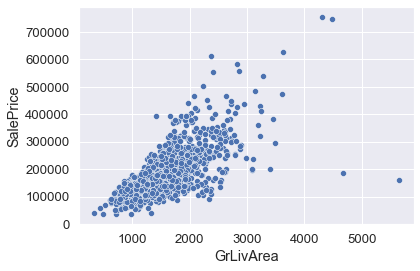

In [41]:
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice)

In [42]:
def skewness_check(df, var):
    y = df[var] 
    fig, ax = plt.subplots(1,2,figsize=(20,10))
    sns.distplot(y,fit=norm, ax = ax[0])
    stats.probplot(y, plot = plt)

C:\Users\redka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


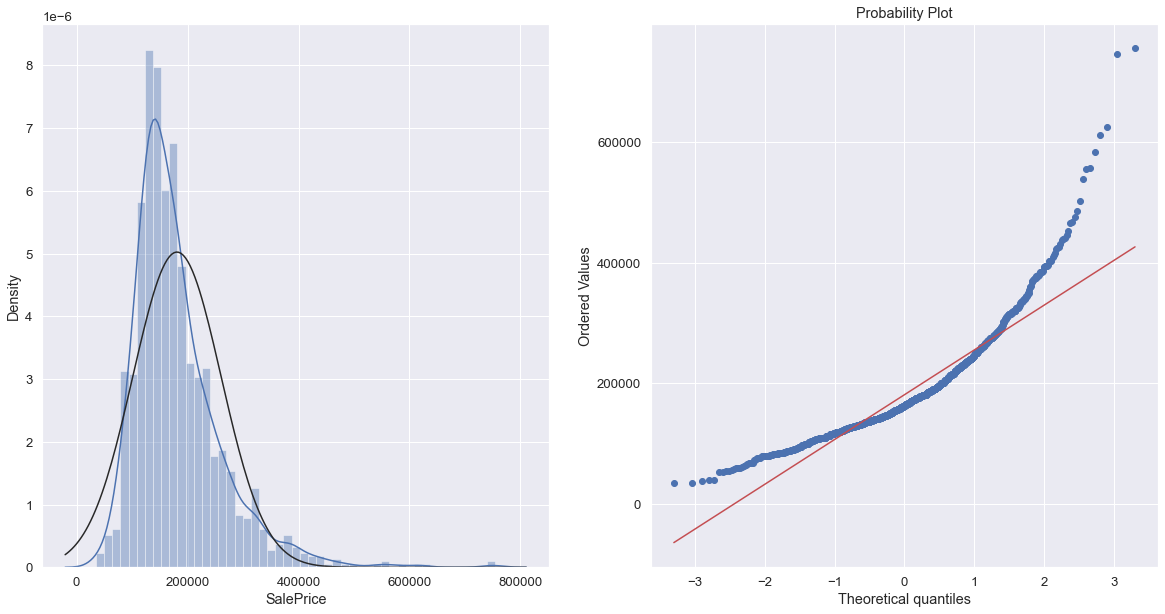

In [43]:
skewness_check(train, 'SalePrice')

In [44]:
y = np.log(y)
train['SalePrice'] = np.log(train['SalePrice'])

C:\Users\redka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


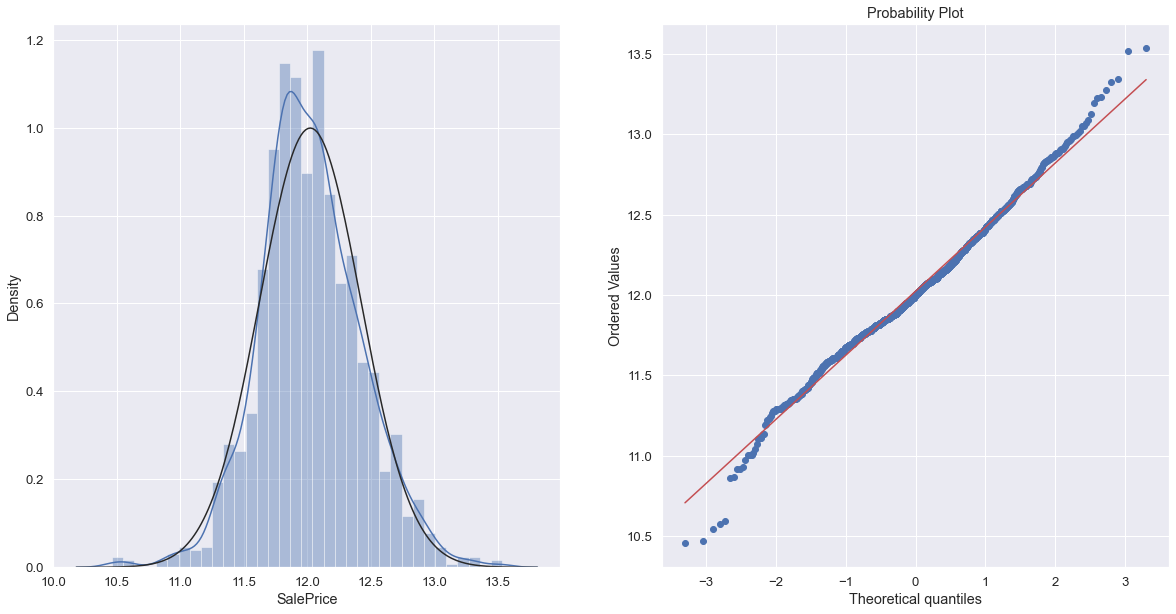

In [45]:
skewness_check(train, 'SalePrice')

C:\Users\redka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


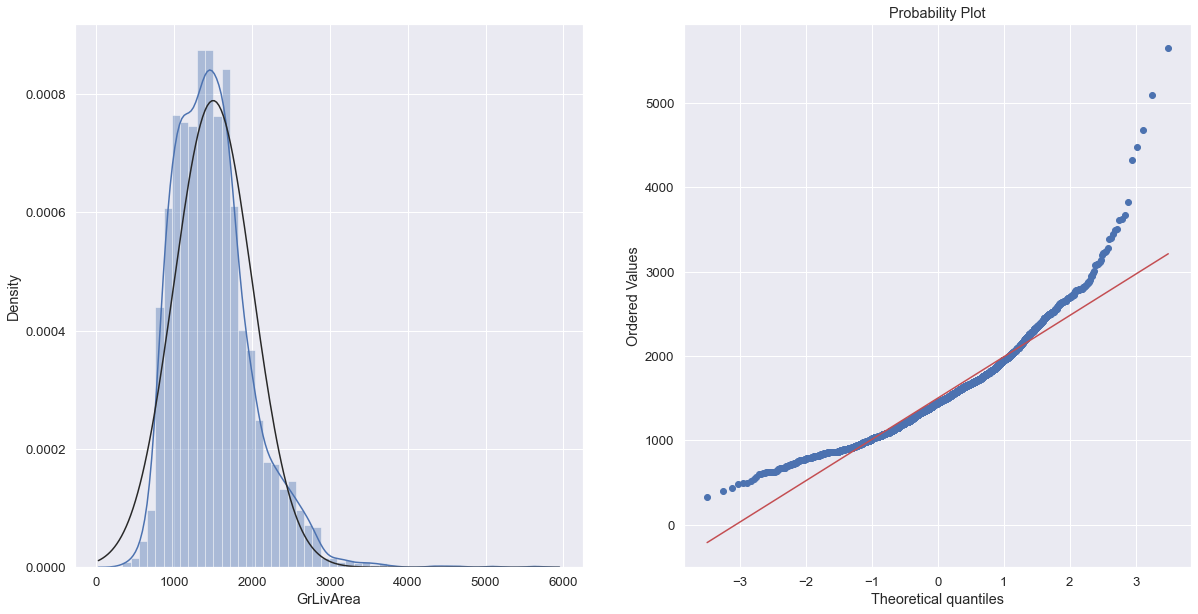

In [46]:
skewness_check(encoded_df, 'GrLivArea')

C:\Users\redka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


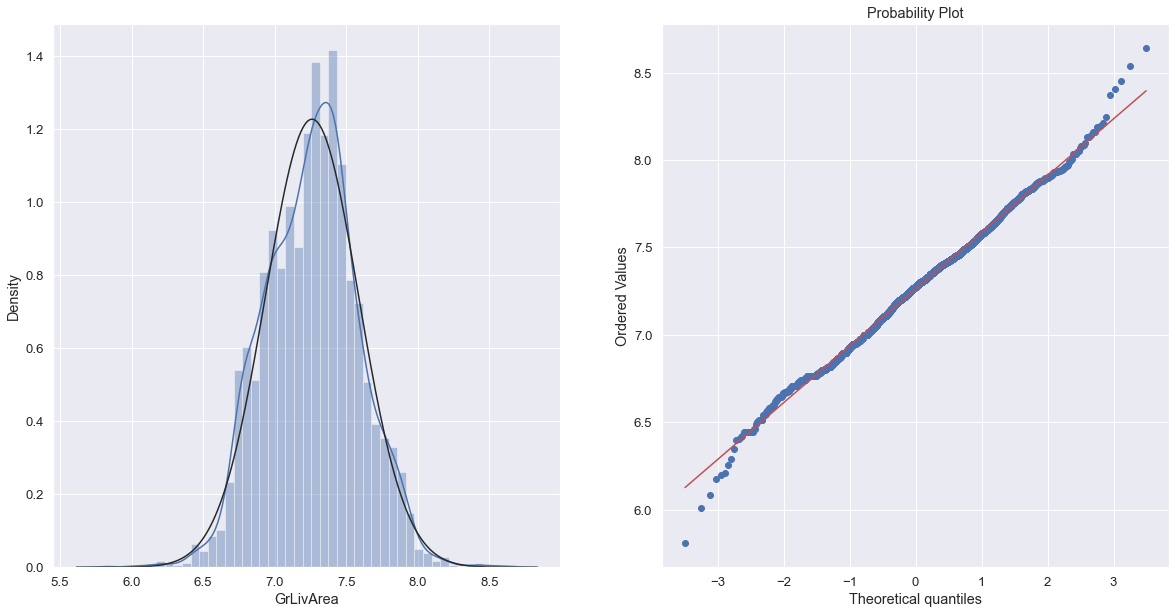

In [47]:
encoded_df['GrLivArea'] = np.log(encoded_df['GrLivArea'])
skewness_check(encoded_df, 'GrLivArea')

In [48]:
encoded_df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90'],
      dtype='object', length=215)

In [49]:
numerical_features = int_features + float_features
skewness = encoded_df[numerical_features].skew(axis = 0)
skewness_df = pd.DataFrame({'Skewness' : skewness[skewness != 0].sort_values(ascending = False)})
skewness_df

,Skewness
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723
BsmtHalfBath,3.933616


In [50]:
asym_cols = skewness_df[(skewness_df['Skewness'] > 0.5)].index
asym_cols

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF',
       'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'BsmtFullBath',
       'OverallCond'],
      dtype='object')

In [51]:
for col in asym_cols:
    encoded_df[col] = boxcox1p(encoded_df[col], 0.1)

In [52]:
skewness = encoded_df[numerical_features].skew(axis = 0)
skewness_df = pd.DataFrame({'Skewness' : skewness[skewness != 0].sort_values(ascending = False)})
skewness_df

,Skewness
PoolArea,15.079669
3SsnPorch,8.890132
LowQualFinSF,8.675799
MiscVal,5.425318
BsmtHalfBath,3.785424
KitchenAbvGr,3.644745
ScreenPorch,2.966869
BsmtFinSF2,2.525824
EnclosedPorch,2.001441
MasVnrArea,0.597619


In [53]:
def evaluate(model, test_features, test_labels):
    print('RMSE:', np.sqrt(metrics.mean_squared_error(model.predict(test_features), test_labels)))

# Train and Test Split

In [54]:
X = encoded_df[:-len(test)]
data_for_submission = encoded_df[-len(test):]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression

In [56]:
rfr = RandomForestRegressor(n_estimators = 4000)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=4000)

In [57]:
evaluate(rfr, X_test, y_test)

RMSE: 0.14674201320816577


# Gradient Boosting Regression

In [58]:
gbr = GradientBoostingRegressor(n_estimators = 4000)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=4000)

In [59]:
evaluate(gbr, X_test, y_test)

RMSE: 0.13402847503189558


In [60]:
gbr.fit(X,y) #0.13258

GradientBoostingRegressor(n_estimators=4000)

# XGBoost Regression

In [61]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=4000)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=4000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
evaluate(xgb, X_test, y_test)

RMSE: 0.140013140652667


# CatBoost Regression

In [ ]:
cat = CatBoostRegressor(learning_rate = 0.01, iterations= 4000)
cat.fit(X_train, y_train, verbose = 0)

In [ ]:
evaluate(cat, X_test, y_test)

In [ ]:
cat.fit(X, y, verbose = 0)

# Lasso Regression

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X_train, y_train)

In [ ]:
evaluate(lasso, X_test, y_test)

# Can we make it better? 

Clearly, Cat Boost Regression model performs the best out of all. However, with hyperparameter tuning, other models may perform better. For this project, I will not perform hyperparameter tuning. 

# Submission

In [ ]:
y_pred = np.exp(cat.predict(data_for_submission))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = y_pred
submission.to_csv(r'C:\Users\redka\Desktop\submission.csv', index = False)

In [ ]:
submission.head()

# Result

Kaggle Scoring index of 0.12324 (Top 13.6%)

Note: Removing multicollinearity using VIF causes the model to perform worse. 